In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[12,5]
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,recall_score,precision_score
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,PowerTransformer
import statsmodels.api as sm
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier
from scipy.stats import ttest_ind,f_oneway,chi2_contingency,kruskal
from scipy import stats
from sklearn.metrics import roc_curve,cohen_kappa_score
from xgboost import XGBClassifier,XGBRFClassifier

In [2]:
data=pd.read_csv('DataCoSupplyChain.csv',encoding='latin1')
pd.options.display.max_columns=None
data.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class


In [3]:
# changing the datatype of wrongly classified columns
data['Late_delivery_risk']=data['Late_delivery_risk'].astype('object')

In [4]:
# we create a copy of the data for further analysis
df=data.copy()

In [5]:
#we create a new column by attactching customer fname, lname to create full name
df['customer full name']= df['Customer Fname']+df['Customer Lname']

In [6]:
df["Late by(Days)"]=df['Days for shipping (real)']-df['Days for shipment (scheduled)']

In [7]:
df.shape

(180519, 55)

In [8]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,customer full name,Late by(Days)
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,CallyHolloway,-1
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,IreneLuna,1


### Drop Columns

In [9]:
df.drop(['Category Id','Customer Email','Customer Fname','Customer Id','Customer Lname','Customer Password','Customer Zipcode',
          'Customer Street','Department Id','Latitude','Longitude','Order Customer Id','Order Id','Order Item Cardprod Id',
          'Order Item Total','Order Item Id','Order Profit Per Order','Order Zipcode','Product Image','Product Card Id',
         'Product Category Id','Product Description','Product Status'],axis=1,inplace=True)

In [10]:
df.shape

(180519, 32)

In [11]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,customer full name,Late by(Days)
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,13.110000,0.04,327.75,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,-1
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,16.389999,0.05,327.75,-0.80,1,327.75,South Asia,Rajastán,PENDING,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1


### Rename Columns

In [12]:
# we are renaming to columns according to the data description for easy understanding
df.rename({'Customer City':'Source City','Customer Country':'Source Country','Customer State':'Source State',
           'Market':'Destination Market','Order City':'Destination City','Order Country':'Destination Country',
           'Order Region':'Destination Region','Order State':'Destination State'},axis=1,inplace=True)

In [13]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Source City,Source Country,Customer Segment,Source State,Department Name,Destination Market,Destination City,Destination Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Destination Region,Destination State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,customer full name,Late by(Days)
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,13.110000,0.04,327.75,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,-1
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,16.389999,0.05,327.75,-0.80,1,327.75,South Asia,Rajastán,PENDING,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1


In [14]:
df.shape

(180519, 32)

### Null Value Treatment

In [15]:
# we drop the null value rows
df.dropna(inplace=True)

In [16]:
df.shape

(180511, 32)

In [17]:
%%time
df['order_year']= pd.to_datetime(df['order date (DateOrders)']).dt.year
df['order_month'] = pd.to_datetime(df['order date (DateOrders)']).dt.month
df['order_week_day'] = pd.to_datetime(df['order date (DateOrders)']).dt.weekday
df['order_hour'] = pd.to_datetime(df['order date (DateOrders)']).dt.hour


#df['shipping_year']= pd.to_datetime(df['shipping date (DateOrders)']).dt.year
#df['shipping_month'] = pd.to_datetime(df['shipping date (DateOrders)']).dt.month
#df['shipping_week_day'] = pd.to_datetime(df['shipping date (DateOrders)']).dt.weekday
#df['shipping_hour'] = pd.to_datetime(df['shipping date (DateOrders)']).dt.hour

CPU times: total: 1min 16s
Wall time: 1min 16s


In [18]:
df.head(2)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Source City,Source Country,Customer Segment,Source State,Department Name,Destination Market,Destination City,Destination Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Destination Region,Destination State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,customer full name,Late by(Days),order_year,order_month,order_week_day,order_hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,13.110000,0.04,327.75,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,-1,2018,1,2,22
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,16.389999,0.05,327.75,-0.80,1,327.75,South Asia,Rajastán,PENDING,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1,2018,1,5,12


In [19]:
df.shape

(180511, 36)

In [20]:
#df_obj=df.select_dtypes('object')

In [21]:
#df_obj.drop(['Category Name','Source City','Destination City','Destination Country','Destination State','Product Name',
#            'order date (DateOrders)','shipping date (DateOrders)','customer full name','Source State'],1,inplace=True)

In [22]:
#len(df_obj.columns)

In [23]:
#df_obj.drop(['Delivery Status','Late_delivery_risk'],1,inplace=True)

In [24]:
#df_obj[['order_year','Days for shipment (scheduled)','order_month']]=df[['order_year','Days for shipment (scheduled)','order_month']]

In [25]:
#df_obj.head(1)

In [26]:
#df_num=df.select_dtypes(exclude='object')

In [27]:
#df_num.drop(['Days for shipping (real)','Days for shipment (scheduled)','Late by(Days)','shipping_year','shipping_month',
 #            'shipping_week_day','shipping_hour'],1,inplace=True)

In [28]:
#len(df_num.columns)

In [29]:
#df_num.head(1)

In [30]:
df['Source Country'].replace('EE. UU.','USA',inplace=True)

### Model Building

In [34]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Source City,Source Country,Customer Segment,Source State,Department Name,Destination Market,Destination City,Destination Country,order date (DateOrders),Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Destination Region,Destination State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,customer full name,Late by(Days),order_year,order_month,order_week_day,order_hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,1/31/2018 22:56,13.110000,0.04,327.75,0.29,1,327.75,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,-1,2018,1,2,22
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:27,16.389999,0.05,327.75,-0.80,1,327.75,South Asia,Rajastán,PENDING,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1,2018,1,5,12
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,USA,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,1/13/2018 12:06,18.030001,0.06,327.75,-0.80,1,327.75,South Asia,Rajastán,CLOSED,Smart watch,327.75,1/17/2018 12:06,Standard Class,GillianMaldonado,0,2018,1,5,12
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,USA,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:45,22.940001,0.07,327.75,0.08,1,327.75,Oceania,Queensland,COMPLETE,Smart watch,327.75,1/16/2018 11:45,Standard Class,TanaTate,-1,2018,1,5,11
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,1/13/2018 11:24,29.500000,0.09,327.75,0.45,1,327.75,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.75,1/15/2018 11:24,Standard Class,OrliHendricks,-2,2018,1,5,11


In [35]:
df_drop=df.drop(['Days for shipping (real)','order date (DateOrders)','Product Name',
                 'shipping date (DateOrders)','Destination State','Destination City','customer full name',
                 'Delivery Status','Category Name','Source City','Late by(Days)'],axis=1)

In [36]:
df_drop.head(2)

,Type,Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Source Country,Customer Segment,Source State,Department Name,Destination Market,Destination Country,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Destination Region,Order Status,Product Price,Shipping Mode,order_year,order_month,order_week_day,order_hour
0,DEBIT,4,91.250000,314.640015,0,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Indonesia,13.110000,0.04,327.75,0.29,1,327.75,Southeast Asia,COMPLETE,327.75,Standard Class,2018,1,2,22
1,TRANSFER,4,-249.089996,311.359985,1,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,India,16.389999,0.05,327.75,-0.80,1,327.75,South Asia,PENDING,327.75,Standard Class,2018,1,5,12


In [37]:
#df['Category Name'].value_counts()

In [38]:
x=df_drop.drop('Late_delivery_risk',1)
y=df_drop['Late_delivery_risk']
df_drop_en=pd.get_dummies(x,drop_first=True)

df_drop_en.head()

,Days for shipment (scheduled),Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Product Price,order_year,order_month,order_week_day,order_hour,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Source Country_USA,Customer Segment_Corporate,Customer Segment_Home Office,Source State_95758,Source State_AL,Source State_AR,Source State_AZ,Source State_CA,Source State_CO,Source State_CT,Source State_DC,Source State_DE,Source State_FL,Source State_GA,Source State_HI,Source State_IA,Source State_ID,Source State_IL,Source State_IN,Source State_KS,Source State_KY,Source State_LA,Source State_MA,Source State_MD,Source State_MI,Source State_MN,Source State_MO,Source State_MT,Source State_NC,Source State_ND,Source State_NJ,Source State_NM,Source State_NV,Source State_NY,Source State_OH,Source State_OK,Source State_OR,Source State_PA,Source State_PR,Source State_RI,Source State_SC,Source State_TN,Source State_TX,Source State_UT,Source State_VA,Source State_WA,Source State_WI,Source State_WV,Department Name_Book Shop,Department Name_Discs Shop,Department Name_Fan Shop,Department Name_Fitness,Department Name_Footwear,Department Name_Golf,Department Name_Health and Beauty,Department Name_Outdoors,Department Name_Pet Shop,Department Name_Technology,Destination Market_Europe,Destination Market_LATAM,Destination Market_Pacific Asia,Destination Market_USCA,Destination Country_Albania,Destination Country_Alemania,Destination Country_Angola,Destination Country_Arabia Saudí,Destination Country_Argelia,Destination Country_Argentina,Destination Country_Armenia,Destination Country_Australia,Destination Country_Austria,Destination Country_Azerbaiyán,Destination Country_Bangladés,Destination Country_Barbados,Destination Country_Baréin,Destination Country_Belice,Destination Country_Benín,Destination Country_Bielorrusia,Destination Country_Bolivia,Destination Country_Bosnia y Herzegovina,Destination Country_Botsuana,Destination Country_Brasil,Destination Country_Bulgaria,Destination Country_Burkina Faso,Destination Country_Burundi,Destination Country_Bután,Destination Country_Bélgica,Destination Country_Camboya,Destination Country_Camerún,Destination Country_Canada,Destination Country_Chad,Destination Country_Chile,Destination Country_China,Destination Country_Chipre,Destination Country_Colombia,Destination Country_Corea del Sur,Destination Country_Costa Rica,Destination Country_Costa de Marfil,Destination Country_Croacia,Destination Country_Cuba,Destination Country_Dinamarca,Destination Country_Ecuador,Destination Country_Egipto,Destination Country_El Salvador,Destination Country_Emiratos Árabes Unidos,Destination Country_Eritrea,Destination Country_Eslovaquia,Destination Country_Eslovenia,Destination Country_España,Destination Country_Estados Unidos,Destination Country_Estonia,Destination Country_Etiopía,Destination Country_Filipinas,Destination Country_Finlandia,Destination Country_Francia,Destination Country_Gabón,Destination Country_Georgia,Destination Country_Ghana,Destination Country_Grecia,Destination Country_Guadalupe,Destination Country_Guatemala,Destination Country_Guayana Francesa,Destination Country_Guinea,Destination Country_Guinea Ecuatorial,Destination Country_Guinea-Bissau,Destination Country_Guyana,Destination Country_Haití,Destination Country_Honduras,Destination Country_Hong Kong,Destination Country_Hungría,Destination Country_India,Destination Country_Indonesia,Destination Country_Irak,Destination Country_Irlanda,Destination Country_Irán,Destination Country_Israel,Destination Country_Italia,Destination Country_Jamaica,Destination Country_Japón,Destination Country_Jordania,Destination Country_Kazajistán,Destination Country_Kenia,Destination Country_Kirguistán,Destination Country_Kuwait,Destination Country_Laos,Destination Country_Lesoto,Destination Country_Liberia,Destination Country_Libia,Destination Country_Lituania,Destination Country_Luxemb

In [39]:
#df_drop_en[df_drop_en.iloc[:,0:14].columns]

In [40]:
df_drop_en[df_drop_en.iloc[:,0:14].columns].skew()

Days for shipment (scheduled)   -0.731994
Benefit per order               -4.742087
Sales per customer               2.888737
Order Item Discount              3.039890
Order Item Discount Rate         0.340900
Order Item Product Price         3.191477
Order Item Profit Ratio         -2.893503
Order Item Quantity              0.880185
Sales                            2.884531
Product Price                    3.191477
order_year                       0.177547
order_month                      0.068055
order_week_day                  -0.006703
order_hour                       0.001262
dtype: float64

In [41]:
df_drop_en.shape

(180511, 275)

In [42]:
y.dtype

dtype('O')

In [43]:
df_drop_en.shape,y.shape

((180511, 275), (180511,))

In [44]:
yint=y.astype('int')

In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(df_drop_en,yint,test_size=.3,random_state=10)

In [46]:
xtrain.shape,ytrain.shape

((126357, 275), (126357,))

In [47]:
xtrain.head()

,Days for shipment (scheduled),Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Product Price,order_year,order_month,order_week_day,order_hour,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Source Country_USA,Customer Segment_Corporate,Customer Segment_Home Office,Source State_95758,Source State_AL,Source State_AR,Source State_AZ,Source State_CA,Source State_CO,Source State_CT,Source State_DC,Source State_DE,Source State_FL,Source State_GA,Source State_HI,Source State_IA,Source State_ID,Source State_IL,Source State_IN,Source State_KS,Source State_KY,Source State_LA,Source State_MA,Source State_MD,Source State_MI,Source State_MN,Source State_MO,Source State_MT,Source State_NC,Source State_ND,Source State_NJ,Source State_NM,Source State_NV,Source State_NY,Source State_OH,Source State_OK,Source State_OR,Source State_PA,Source State_PR,Source State_RI,Source State_SC,Source State_TN,Source State_TX,Source State_UT,Source State_VA,Source State_WA,Source State_WI,Source State_WV,Department Name_Book Shop,Department Name_Discs Shop,Department Name_Fan Shop,Department Name_Fitness,Department Name_Footwear,Department Name_Golf,Department Name_Health and Beauty,Department Name_Outdoors,Department Name_Pet Shop,Department Name_Technology,Destination Market_Europe,Destination Market_LATAM,Destination Market_Pacific Asia,Destination Market_USCA,Destination Country_Albania,Destination Country_Alemania,Destination Country_Angola,Destination Country_Arabia Saudí,Destination Country_Argelia,Destination Country_Argentina,Destination Country_Armenia,Destination Country_Australia,Destination Country_Austria,Destination Country_Azerbaiyán,Destination Country_Bangladés,Destination Country_Barbados,Destination Country_Baréin,Destination Country_Belice,Destination Country_Benín,Destination Country_Bielorrusia,Destination Country_Bolivia,Destination Country_Bosnia y Herzegovina,Destination Country_Botsuana,Destination Country_Brasil,Destination Country_Bulgaria,Destination Country_Burkina Faso,Destination Country_Burundi,Destination Country_Bután,Destination Country_Bélgica,Destination Country_Camboya,Destination Country_Camerún,Destination Country_Canada,Destination Country_Chad,Destination Country_Chile,Destination Country_China,Destination Country_Chipre,Destination Country_Colombia,Destination Country_Corea del Sur,Destination Country_Costa Rica,Destination Country_Costa de Marfil,Destination Country_Croacia,Destination Country_Cuba,Destination Country_Dinamarca,Destination Country_Ecuador,Destination Country_Egipto,Destination Country_El Salvador,Destination Country_Emiratos Árabes Unidos,Destination Country_Eritrea,Destination Country_Eslovaquia,Destination Country_Eslovenia,Destination Country_España,Destination Country_Estados Unidos,Destination Country_Estonia,Destination Country_Etiopía,Destination Country_Filipinas,Destination Country_Finlandia,Destination Country_Francia,Destination Country_Gabón,Destination Country_Georgia,Destination Country_Ghana,Destination Country_Grecia,Destination Country_Guadalupe,Destination Country_Guatemala,Destination Country_Guayana Francesa,Destination Country_Guinea,Destination Country_Guinea Ecuatorial,Destination Country_Guinea-Bissau,Destination Country_Guyana,Destination Country_Haití,Destination Country_Honduras,Destination Country_Hong Kong,Destination Country_Hungría,Destination Country_India,Destination Country_Indonesia,Destination Country_Irak,Destination Country_Irlanda,Destination Country_Irán,Destination Country_Israel,Destination Country_Italia,Destination Country_Jamaica,Destination Country_Japón,Destination Country_Jordania,Destination Country_Kazajistán,Destination Country_Kenia,Destination Country_Kirguistán,Destination Country_Kuwait,Destination Country_Laos,Destination Country_Lesoto,Destination Country_Liberia,Destination Country_Libia,Destination Country_Lituania,Destination Country_Luxemb

# Scaling

In [49]:
SS=StandardScaler()
xtrain[df_drop_en.iloc[:,0:14].columns]=SS.fit_transform(xtrain[df_drop_en.iloc[:,0:14].columns])
xtest[df_drop_en.iloc[:,0:14].columns]=SS.transform(xtest[df_drop_en.iloc[:,0:14].columns])

In [50]:
xtrain.head()

,Days for shipment (scheduled),Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Product Price,order_year,order_month,order_week_day,order_hour,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Source Country_USA,Customer Segment_Corporate,Customer Segment_Home Office,Source State_95758,Source State_AL,Source State_AR,Source State_AZ,Source State_CA,Source State_CO,Source State_CT,Source State_DC,Source State_DE,Source State_FL,Source State_GA,Source State_HI,Source State_IA,Source State_ID,Source State_IL,Source State_IN,Source State_KS,Source State_KY,Source State_LA,Source State_MA,Source State_MD,Source State_MI,Source State_MN,Source State_MO,Source State_MT,Source State_NC,Source State_ND,Source State_NJ,Source State_NM,Source State_NV,Source State_NY,Source State_OH,Source State_OK,Source State_OR,Source State_PA,Source State_PR,Source State_RI,Source State_SC,Source State_TN,Source State_TX,Source State_UT,Source State_VA,Source State_WA,Source State_WI,Source State_WV,Department Name_Book Shop,Department Name_Discs Shop,Department Name_Fan Shop,Department Name_Fitness,Department Name_Footwear,Department Name_Golf,Department Name_Health and Beauty,Department Name_Outdoors,Department Name_Pet Shop,Department Name_Technology,Destination Market_Europe,Destination Market_LATAM,Destination Market_Pacific Asia,Destination Market_USCA,Destination Country_Albania,Destination Country_Alemania,Destination Country_Angola,Destination Country_Arabia Saudí,Destination Country_Argelia,Destination Country_Argentina,Destination Country_Armenia,Destination Country_Australia,Destination Country_Austria,Destination Country_Azerbaiyán,Destination Country_Bangladés,Destination Country_Barbados,Destination Country_Baréin,Destination Country_Belice,Destination Country_Benín,Destination Country_Bielorrusia,Destination Country_Bolivia,Destination Country_Bosnia y Herzegovina,Destination Country_Botsuana,Destination Country_Brasil,Destination Country_Bulgaria,Destination Country_Burkina Faso,Destination Country_Burundi,Destination Country_Bután,Destination Country_Bélgica,Destination Country_Camboya,Destination Country_Camerún,Destination Country_Canada,Destination Country_Chad,Destination Country_Chile,Destination Country_China,Destination Country_Chipre,Destination Country_Colombia,Destination Country_Corea del Sur,Destination Country_Costa Rica,Destination Country_Costa de Marfil,Destination Country_Croacia,Destination Country_Cuba,Destination Country_Dinamarca,Destination Country_Ecuador,Destination Country_Egipto,Destination Country_El Salvador,Destination Country_Emiratos Árabes Unidos,Destination Country_Eritrea,Destination Country_Eslovaquia,Destination Country_Eslovenia,Destination Country_España,Destination Country_Estados Unidos,Destination Country_Estonia,Destination Country_Etiopía,Destination Country_Filipinas,Destination Country_Finlandia,Destination Country_Francia,Destination Country_Gabón,Destination Country_Georgia,Destination Country_Ghana,Destination Country_Grecia,Destination Country_Guadalupe,Destination Country_Guatemala,Destination Country_Guayana Francesa,Destination Country_Guinea,Destination Country_Guinea Ecuatorial,Destination Country_Guinea-Bissau,Destination Country_Guyana,Destination Country_Haití,Destination Country_Honduras,Destination Country_Hong Kong,Destination Country_Hungría,Destination Country_India,Destination Country_Indonesia,Destination Country_Irak,Destination Country_Irlanda,Destination Country_Irán,Destination Country_Israel,Destination Country_Italia,Destination Country_Jamaica,Destination Country_Japón,Destination Country_Jordania,Destination Country_Kazajistán,Destination Country_Kenia,Destination Country_Kirguistán,Destination Country_Kuwait,Destination Country_Laos,Destination Country_Lesoto,Destination Country_Liberia,Destination Country_Libia,Destination Country_Lituania,Destination Country_Luxemb

In [54]:
xtrain[df_drop_en.iloc[:,0:10].columns].skew()

Days for shipment (scheduled)   -0.459205
Benefit per order                1.436776
Sales per customer               0.075913
Order Item Discount              0.207370
Order Item Discount Rate         0.074242
Order Item Product Price         0.377820
Order Item Profit Ratio         -0.192565
Order Item Quantity              0.434438
Sales                            0.074588
Product Price                    0.377820
dtype: float64

In [51]:
xtest[df_drop_en.iloc[:,0:10].columns].head()

,Days for shipment (scheduled),Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Product Price
104278,0.777299,0.329201,-0.026439,-0.030985,-0.023548,0.423551,0.404336,-0.778186,-0.029111,0.423551
20992,0.777299,0.038003,-1.047542,-0.834794,-0.875094,-0.580434,0.703389,-0.778186,-1.088387,-0.580434
42867,-1.408738,0.007849,-0.702086,-0.898733,-1.300866,-0.652075,0.233449,-0.091059,-0.785661,-0.652075
135195,0.777299,-0.177573,-0.818878,-0.259340,0.686074,-0.652075,-0.172409,-0.091059,-0.785661,-0.652075
156518,-1.408738,-0.168096,-1.215140,-0.373517,2.105316,-0.652075,-0.001521,-0.778186,-1.163974,-0.652075


# Transformation

In [52]:
PT=PowerTransformer()
xtrain[df_drop_en.iloc[:,0:10].columns]=PT.fit_transform(xtrain[df_drop_en.iloc[:,0:10].columns])
xtest[df_drop_en.iloc[:,0:10].columns]=PT.transform(xtest[df_drop_en.iloc[:,0:10].columns])

In [55]:
xtrain[df_drop_en.iloc[:,0:10].columns].skew()

Days for shipment (scheduled)   -0.459205
Benefit per order                1.436776
Sales per customer               0.075913
Order Item Discount              0.207370
Order Item Discount Rate         0.074242
Order Item Product Price         0.377820
Order Item Profit Ratio         -0.192565
Order Item Quantity              0.434438
Sales                            0.074588
Product Price                    0.377820
dtype: float64

In [109]:
score_card_ST=pd.DataFrame(index=(['desc','accuracy train','accuracy test','precision','recall','f1','Cohen-kappa']))
score_card_ST

""
desc
accuracy train
accuracy test
precision
recall
f1
Cohen-kappa


In [ ]:
#accuracy_score()

In [110]:
%%time
KNN=KNeighborsClassifier()
model1=KNN.fit(xtrain,ytrain)
ypredt=model1.predict(xtrain)
ypred1=model1.predict(xtest)
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65     24442
           1       0.71      0.71      0.71     29712

    accuracy                           0.68     54154
   macro avg       0.68      0.68      0.68     54154
weighted avg       0.68      0.68      0.68     54154

CPU times: total: 23min 41s
Wall time: 13min 28s


In [111]:
def sc(text,desc,ytest,ypred):
    score_card_ST[text]=[desc,accuracy_score(ytrain,ypredt),accuracy_score(ytest,ypred),precision_score(ytest,ypred),recall_score(ytest,ypred),f1_score(ytest,ypred),cohen_kappa_score(ytest,ypred)]
    return score_card_ST

In [112]:
sc('KNN','KNN',ytest,ypred1)

,KNN
desc,KNN
accuracy train,0.795326
accuracy test,0.680282
precision,0.709908
recall,0.705607
f1,0.707751
Cohen-kappa,0.354872


In [48]:
#recall_score(ytest,ypred1)

In [49]:
#precision_score(ytest,ypred1)

In [50]:
#f1_score(ytest,ypred1)

In [51]:
#accuracy_score(ytest,ypred1)

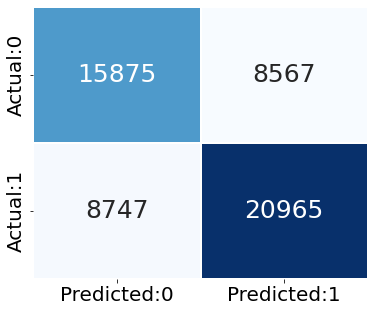

In [113]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, ypred1)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [114]:
tn,fp,fn,tp=confusion_matrix(ytest, ypred1).ravel()
tn,fp,fn,tp

(15875, 8567, 8747, 20965)

In [115]:
LR=LogisticRegression()
model2=LR.fit(xtrain,ytrain)
ypredt=model2.predict(xtrain)
ypred2=model2.predict(xtest)
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.63      0.90      0.75     24442
           1       0.88      0.57      0.69     29712

    accuracy                           0.72     54154
   macro avg       0.76      0.74      0.72     54154
weighted avg       0.77      0.72      0.72     54154



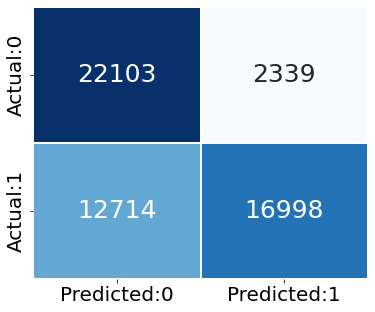

In [116]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, ypred2)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [117]:
sc('LogisticReg','LogisticRegression',ytest,ypred2)

,KNN,LogisticReg
desc,KNN,LogisticRegression
accuracy train,0.795326,0.725302
accuracy test,0.680282,0.722033
precision,0.709908,0.87904
recall,0.705607,0.572092
f1,0.707751,0.693103
Cohen-kappa,0.354872,0.459113


In [118]:
DT=DecisionTreeClassifier()
model3=DT.fit(xtrain,ytrain)
ypredt=model3.predict(xtrain)
ypred3=model3.predict(xtest)
print(classification_report(ytest,ypred3))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70     24442
           1       0.75      0.75      0.75     29712

    accuracy                           0.73     54154
   macro avg       0.72      0.72      0.72     54154
weighted avg       0.73      0.73      0.73     54154



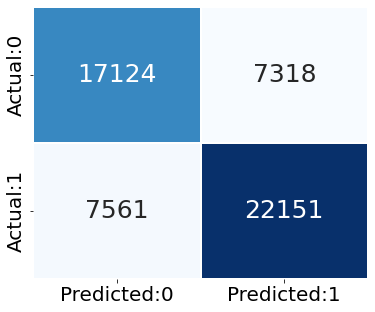

In [119]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, ypred3)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [120]:
sc('DT','DecisionTree',ytest,ypred3)

,KNN,LogisticReg,DT
desc,KNN,LogisticRegression,DecisionTree
accuracy train,0.795326,0.725302,1.0
accuracy test,0.680282,0.722033,0.725247
precision,0.709908,0.87904,0.751671
recall,0.705607,0.572092,0.745524
f1,0.707751,0.693103,0.748585
Cohen-kappa,0.354872,0.459113,0.445728


In [121]:
%%time
RF=RandomForestClassifier()
model4=RF.fit(xtrain,ytrain)
ypredt=model4.predict(xtrain)
ypred4=model4.predict(xtest)
print(classification_report(ytest,ypred4))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78     24442
           1       0.87      0.70      0.77     29712

    accuracy                           0.78     54154
   macro avg       0.79      0.78      0.78     54154
weighted avg       0.79      0.78      0.78     54154

CPU times: total: 1min 50s
Wall time: 1min 53s


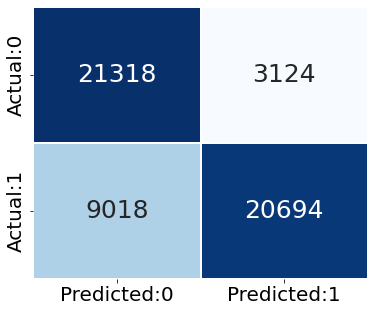

In [122]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, ypred4)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [123]:
sc('RF','Randomforest',ytest,ypred4)

,KNN,LogisticReg,DT,RF
desc,KNN,LogisticRegression,DecisionTree,Randomforest
accuracy train,0.795326,0.725302,1.0,1.0
accuracy test,0.680282,0.722033,0.725247,0.775788
precision,0.709908,0.87904,0.751671,0.868839
recall,0.705607,0.572092,0.745524,0.696486
f1,0.707751,0.693103,0.748585,0.773174
Cohen-kappa,0.354872,0.459113,0.445728,0.556767


In [60]:
#sc('RF','Randomforest',ytest,ypred4)

In [124]:
AD=AdaBoostClassifier()
model5=AD.fit(xtrain,ytrain)
ypredt=model5.predict(xtrain)
ypred5=model5.predict(xtest)
print(classification_report(ytest,ypred5))

              precision    recall  f1-score   support

           0       0.64      0.89      0.74     24442
           1       0.87      0.58      0.70     29712

    accuracy                           0.72     54154
   macro avg       0.75      0.74      0.72     54154
weighted avg       0.77      0.72      0.72     54154



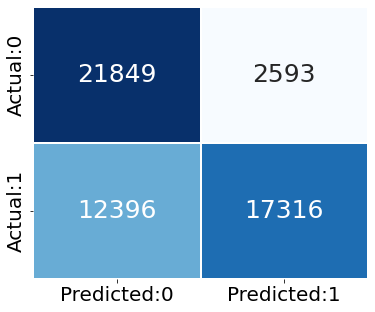

In [125]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, ypred5)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [126]:
sc('AD','AdaBoost',ytest,ypred5)

,KNN,LogisticReg,DT,RF,AD
desc,KNN,LogisticRegression,DecisionTree,Randomforest,AdaBoost
accuracy train,0.795326,0.725302,1.0,1.0,0.725587
accuracy test,0.680282,0.722033,0.725247,0.775788,0.723215
precision,0.709908,0.87904,0.751671,0.868839,0.869757
recall,0.705607,0.572092,0.745524,0.696486,0.582795
f1,0.707751,0.693103,0.748585,0.773174,0.69793
Cohen-kappa,0.354872,0.459113,0.445728,0.556767,0.460333


In [127]:
GB=GradientBoostingClassifier()
model6=GB.fit(xtrain,ytrain)
ypredt=model6.predict(xtrain)
ypred6=model6.predict(xtest)
print(classification_report(ytest,ypred6))

              precision    recall  f1-score   support

           0       0.64      0.92      0.76     24442
           1       0.90      0.58      0.71     29712

    accuracy                           0.73     54154
   macro avg       0.77      0.75      0.73     54154
weighted avg       0.78      0.73      0.73     54154



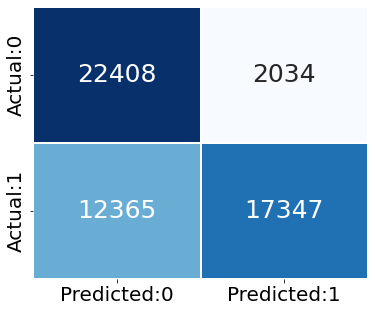

In [128]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, ypred6)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [129]:
sc('GB','GradientBoost',ytest,ypred6)

,KNN,LogisticReg,DT,RF,AD,GB
desc,KNN,LogisticRegression,DecisionTree,Randomforest,AdaBoost,GradientBoost
accuracy train,0.795326,0.725302,1.0,1.0,0.725587,0.736421
accuracy test,0.680282,0.722033,0.725247,0.775788,0.723215,0.73411
precision,0.709908,0.87904,0.751671,0.868839,0.869757,0.895052
recall,0.705607,0.572092,0.745524,0.696486,0.582795,0.583838
f1,0.707751,0.693103,0.748585,0.773174,0.69793,0.7067
Cohen-kappa,0.354872,0.459113,0.445728,0.556767,0.460333,0.482533


In [77]:
SS=StandardScaler()
xtrain1[df_drop_en.iloc[:,0:14].columns]=SS.fit_transform(xtrain1[df_drop_en.iloc[:,0:14].columns])
xtest1[df_drop_en.iloc[:,0:14].columns]=SS.transform(xtest1[df_drop_en.iloc[:,0:14].columns])

In [78]:
PT=PowerTransformer()
xtrain1[df_drop_en.iloc[:,0:10].columns]=PT.fit_transform(xtrain1[df_drop_en.iloc[:,0:10].columns])
xtest1[df_drop_en.iloc[:,0:10].columns]=PT.transform(xtest1[df_drop_en.iloc[:,0:10].columns])

tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]

decision_tree_classification = DecisionTreeClassifier(random_state = 10)
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5,n_jobs=-1)
tree_grid_model = tree_grid.fit(xtrain, ytrain)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

%%time
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]

decision_tree_classification = DecisionTreeClassifier(random_state = 10)
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, scoring='accuracy',
                         cv = 5,n_jobs=-1)
tree_grid_model = tree_grid.fit(xtrain,ytrain)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

In [130]:
%%time
DT=DecisionTreeClassifier(criterion= 'entropy',max_depth=4,max_leaf_nodes= 8,
                          min_samples_leaf= 1,min_samples_split=2,random_state=10)
model7=DT.fit(xtrain,ytrain)
ypredt=model7.predict(xtrain)
ypred7=model7.predict(xtest)
print(classification_report(ytest,ypred7))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75     24442
           1       0.88      0.58      0.70     29712

    accuracy                           0.73     54154
   macro avg       0.76      0.74      0.72     54154
weighted avg       0.77      0.73      0.72     54154

CPU times: total: 1.88 s
Wall time: 1.87 s


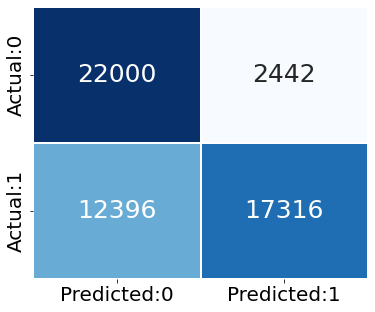

In [131]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, ypred7)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [132]:
sc('DT_T','DT tuned',ytest,ypred7)

,KNN,LogisticReg,DT,RF,AD,GB,DT_T
desc,KNN,LogisticRegression,DecisionTree,Randomforest,AdaBoost,GradientBoost,DT tuned
accuracy train,0.795326,0.725302,1.0,1.0,0.725587,0.736421,0.72793
accuracy test,0.680282,0.722033,0.725247,0.775788,0.723215,0.73411,0.726004
precision,0.709908,0.87904,0.751671,0.868839,0.869757,0.895052,0.876404
recall,0.705607,0.572092,0.745524,0.696486,0.582795,0.583838,0.582795
f1,0.707751,0.693103,0.748585,0.773174,0.69793,0.7067,0.700061
Cohen-kappa,0.354872,0.459113,0.445728,0.556767,0.460333,0.482533,0.466053


%%time
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [4,6,10, 15, 20],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5,7, 9],
                     'max_leaf_nodes': [2, 5, 8,9, 11]}]
 
random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters,
                       scoring='accuracy',
                       n_jobs=-1,cv = 5)

rf_grid_model = rf_grid.fit(xtrain, ytrain)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

In [133]:
%%time
RF=RandomForestClassifier(criterion='gini',max_depth=10,max_leaf_nodes=11,min_samples_leaf=9,min_samples_split=2,
                          n_estimators=10,random_state=10)
model8=RF.fit(xtrain,ytrain)
ypredt=model8.predict(xtrain)
ypred8=model8.predict(xtest)
print(classification_report(ytest,ypred8))

              precision    recall  f1-score   support

           0       0.63      0.53      0.57     24442
           1       0.66      0.74      0.70     29712

    accuracy                           0.65     54154
   macro avg       0.64      0.64      0.64     54154
weighted avg       0.64      0.65      0.64     54154

CPU times: total: 2.25 s
Wall time: 2.3 s


In [134]:
print(classification_report(ytrain,ypredt))

              precision    recall  f1-score   support

           0       0.64      0.54      0.58     57096
           1       0.66      0.75      0.71     69261

    accuracy                           0.66    126357
   macro avg       0.65      0.64      0.64    126357
weighted avg       0.65      0.66      0.65    126357



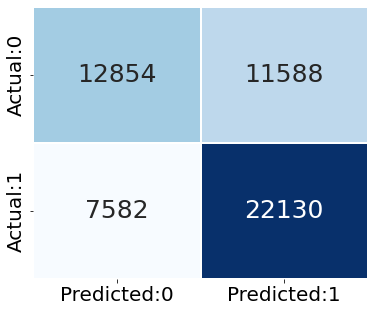

In [135]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, ypred8)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [83]:
%%time
RF=RandomForestClassifier(min_samples_leaf=9,random_state=10)
model8=RF.fit(xtrain,ytrain)
ypredt=model8.predict(xtrain)
ypred8=model8.predict(xtest)
print(classification_report(ytest,ypred8))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75     24442
           1       0.88      0.59      0.70     29712

    accuracy                           0.73     54154
   macro avg       0.76      0.74      0.73     54154
weighted avg       0.77      0.73      0.72     54154

CPU times: total: 1min 5s
Wall time: 1min 6s


In [84]:
%%time
RF=RandomForestClassifier(n_estimators=10,random_state=10)
model8=RF.fit(xtrain,ytrain)
ypredt=model8.predict(xtrain)
ypred8=model8.predict(xtest)
print(classification_report(ytest,ypred8))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75     24442
           1       0.82      0.69      0.75     29712

    accuracy                           0.75     54154
   macro avg       0.75      0.76      0.75     54154
weighted avg       0.76      0.75      0.75     54154

CPU times: total: 9.78 s
Wall time: 9.83 s


In [136]:
sc('RF_T','RF tuned',ytest,ypred8)

,KNN,LogisticReg,DT,RF,AD,GB,DT_T,RF_T
desc,KNN,LogisticRegression,DecisionTree,Randomforest,AdaBoost,GradientBoost,DT tuned,RF tuned
accuracy train,0.795326,0.725302,1.0,1.0,0.725587,0.736421,0.72793,0.655112
accuracy test,0.680282,0.722033,0.725247,0.775788,0.723215,0.73411,0.726004,0.64601
precision,0.709908,0.87904,0.751671,0.868839,0.869757,0.895052,0.876404,0.656326
recall,0.705607,0.572092,0.745524,0.696486,0.582795,0.583838,0.582795,0.744817
f1,0.707751,0.693103,0.748585,0.773174,0.69793,0.7067,0.700061,0.697777
Cohen-kappa,0.354872,0.459113,0.445728,0.556767,0.460333,0.482533,0.466053,0.274708


In [71]:
#x.head()

In [72]:
#x['Department Name'].value_counts()

In [77]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [142]:
%%time
XG=XGBClassifier()
model9=XG.fit(xtrain,ytrain)
ypredt=model9.predict(xtrain)
ypred9=model9.predict(xtest)
print(classification_report(ytest,ypred9))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76     24442
           1       0.87      0.62      0.72     29712

    accuracy                           0.74     54154
   macro avg       0.76      0.75      0.74     54154
weighted avg       0.77      0.74      0.74     54154

CPU times: total: 6min 19s
Wall time: 59.1 s


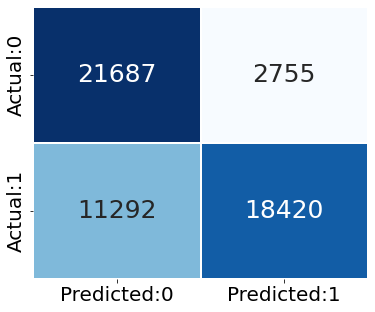

In [143]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, ypred9)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [144]:
sc('XG','XGBoost',ytest,ypred9)

,KNN,LogisticReg,DT,RF,AD,GB,DT_T,RF_T,XG,XGRF
desc,KNN,LogisticRegression,DecisionTree,Randomforest,AdaBoost,GradientBoost,DT tuned,RF tuned,XGBoost,XGBoost RF
accuracy train,0.795326,0.725302,1.0,1.0,0.725587,0.736421,0.72793,0.655112,0.761802,0.655112
accuracy test,0.680282,0.722033,0.725247,0.775788,0.723215,0.73411,0.726004,0.64601,0.74061,0.726041
precision,0.709908,0.87904,0.751671,0.868839,0.869757,0.895052,0.876404,0.656326,0.869894,0.87505
recall,0.705607,0.572092,0.745524,0.696486,0.582795,0.583838,0.582795,0.744817,0.619952,0.584074
f1,0.707751,0.693103,0.748585,0.773174,0.69793,0.7067,0.700061,0.697777,0.723957,0.700549
Cohen-kappa,0.354872,0.459113,0.445728,0.556767,0.460333,0.482533,0.466053,0.274708,0.491996,0.465986


In [145]:
%%time
XGRF=XGBRFClassifier()
model10=XGRF.fit(xtrain,ytrain)
ypredt=model10.predict(xtrain)
ypred10=model10.predict(xtest)
print(classification_report(ytest,ypred10))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75     24442
           1       0.88      0.58      0.70     29712

    accuracy                           0.73     54154
   macro avg       0.76      0.74      0.72     54154
weighted avg       0.77      0.73      0.72     54154

CPU times: total: 5min 6s
Wall time: 42 s


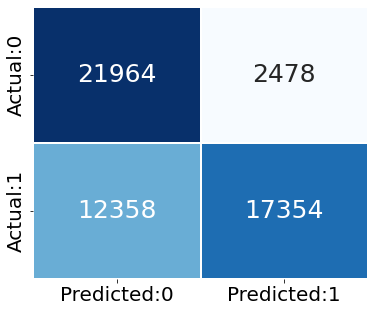

In [146]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, ypred10)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [147]:
sc('XGRF','XGBoost RF',ytest,ypred10)

,KNN,LogisticReg,DT,RF,AD,GB,DT_T,RF_T,XG,XGRF
desc,KNN,LogisticRegression,DecisionTree,Randomforest,AdaBoost,GradientBoost,DT tuned,RF tuned,XGBoost,XGBoost RF
accuracy train,0.795326,0.725302,1.0,1.0,0.725587,0.736421,0.72793,0.655112,0.761802,0.728689
accuracy test,0.680282,0.722033,0.725247,0.775788,0.723215,0.73411,0.726004,0.64601,0.74061,0.726041
precision,0.709908,0.87904,0.751671,0.868839,0.869757,0.895052,0.876404,0.656326,0.869894,0.87505
recall,0.705607,0.572092,0.745524,0.696486,0.582795,0.583838,0.582795,0.744817,0.619952,0.584074
f1,0.707751,0.693103,0.748585,0.773174,0.69793,0.7067,0.700061,0.697777,0.723957,0.700549
Cohen-kappa,0.354872,0.459113,0.445728,0.556767,0.460333,0.482533,0.466053,0.274708,0.491996,0.465986


In [90]:
estimators = [('RF', RandomForestClassifier()),
             ('XG', XGBClassifier())]
STA = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())
model11=STA.fit(xtrain,ytrain)
ypredt=model11.predict(xtrain)
ypred11=model11.predict(xtest)
print(classification_report(ytest,ypred11))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68     24442
           1       0.74      0.74      0.74     29712

    accuracy                           0.72     54154
   macro avg       0.71      0.71      0.71     54154
weighted avg       0.72      0.72      0.72     54154



In [81]:
estimators = [('RF', RandomForestClassifier()),
             ('XG', XGBClassifier())]
STA = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model11=STA.fit(xtrain,ytrain)
ypred11=model11.predict(xtest)
print(classification_report(ytest,ypred11))

              precision    recall  f1-score   support

           0       0.71      0.85      0.78     24442
           1       0.86      0.72      0.78     29712

    accuracy                           0.78     54154
   macro avg       0.78      0.79      0.78     54154
weighted avg       0.79      0.78      0.78     54154



In [91]:
estimators = [('RF', RandomForestClassifier()),
             ('XG', XGBClassifier())]
STA = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())
model11=STA.fit(xtrain,ytrain)
ypredt=model11.predict(xtrain)
ypred11=model11.predict(xtest)
print(classification_report(ytest,ypred11))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78     24442
           1       0.84      0.75      0.79     29712

    accuracy                           0.78     54154
   macro avg       0.79      0.79      0.78     54154
weighted avg       0.79      0.78      0.79     54154



In [148]:
estimators = [('DT',DecisionTreeClassifier(criterion= 'entropy',max_depth=4,max_leaf_nodes= 8,
                          min_samples_leaf= 1,min_samples_split=2,random_state=10)),
             ('XG', XGBClassifier())]
STA = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())
model11=STA.fit(xtrain,ytrain)
ypredt=model11.predict(xtrain)
ypred11=model11.predict(xtest)
print(classification_report(ytest,ypred11))

              precision    recall  f1-score   support

           0       0.66      0.88      0.75     24442
           1       0.87      0.62      0.72     29712

    accuracy                           0.74     54154
   macro avg       0.76      0.75      0.74     54154
weighted avg       0.77      0.74      0.74     54154



In [149]:
print(classification_report(ytrain,ypredt))

              precision    recall  f1-score   support

           0       0.68      0.90      0.77     57096
           1       0.89      0.65      0.75     69261

    accuracy                           0.76    126357
   macro avg       0.78      0.77      0.76    126357
weighted avg       0.79      0.76      0.76    126357



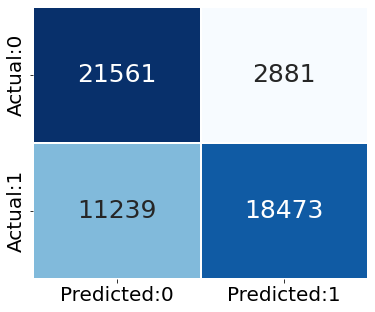

In [150]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, ypred11)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [151]:
sc('STA','Stacking XGB+DT_T',ytest,ypred11)

,KNN,LogisticReg,DT,RF,AD,GB,DT_T,RF_T,XG,XGRF,STA
desc,KNN,LogisticRegression,DecisionTree,Randomforest,AdaBoost,GradientBoost,DT tuned,RF tuned,XGBoost,XGBoost RF,Stacking XGB+DT_T
accuracy train,0.795326,0.725302,1.0,1.0,0.725587,0.736421,0.72793,0.655112,0.761802,0.728689,0.761264
accuracy test,0.680282,0.722033,0.725247,0.775788,0.723215,0.73411,0.726004,0.64601,0.74061,0.726041,0.739262
precision,0.709908,0.87904,0.751671,0.868839,0.869757,0.895052,0.876404,0.656326,0.869894,0.87505,0.865084
recall,0.705607,0.572092,0.745524,0.696486,0.582795,0.583838,0.582795,0.744817,0.619952,0.584074,0.621735
f1,0.707751,0.693103,0.748585,0.773174,0.69793,0.7067,0.700061,0.697777,0.723957,0.700549,0.723495
Cohen-kappa,0.354872,0.459113,0.445728,0.556767,0.460333,0.482533,0.466053,0.274708,0.491996,0.465986,0.489034


In [155]:
estimators = [('DT',DecisionTreeClassifier(criterion= 'entropy',max_depth=4,max_leaf_nodes= 8,
                          min_samples_leaf= 1,min_samples_split=2,random_state=10)),
             ('RF', RandomForestClassifier(criterion='gini',max_depth=10,max_leaf_nodes=11,min_samples_leaf=9,min_samples_split=2,
                          n_estimators=10,random_state=10))]
STA = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model11=STA.fit(xtrain,ytrain)
ypredt=model11.predict(xtrain)
ypred11=model11.predict(xtest)
print(classification_report(ytest,ypred11))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75     24442
           1       0.88      0.58      0.70     29712

    accuracy                           0.73     54154
   macro avg       0.76      0.74      0.72     54154
weighted avg       0.77      0.73      0.72     54154



In [156]:
print(classification_report(ytrain,ypredt))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75     57096
           1       0.88      0.59      0.70     69261

    accuracy                           0.73    126357
   macro avg       0.76      0.74      0.73    126357
weighted avg       0.77      0.73      0.72    126357



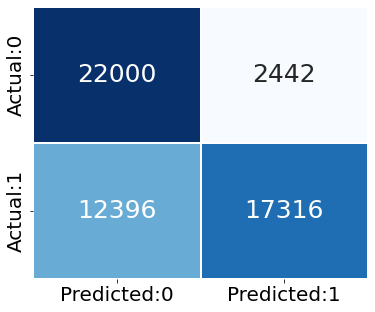

In [157]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, ypred11)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [158]:
sc('STA_DR','Stacking RF_T+DT_T',ytest,ypred11)

,KNN,LogisticReg,DT,RF,AD,GB,DT_T,RF_T,XG,XGRF,STA,STA_DR
desc,KNN,LogisticRegression,DecisionTree,Randomforest,AdaBoost,GradientBoost,DT tuned,RF tuned,XGBoost,XGBoost RF,Stacking XGB+DT_T,Stacking RF_T+DT_T
accuracy train,0.795326,0.725302,1.0,1.0,0.725587,0.736421,0.72793,0.655112,0.761802,0.728689,0.761264,0.72793
accuracy test,0.680282,0.722033,0.725247,0.775788,0.723215,0.73411,0.726004,0.64601,0.74061,0.726041,0.739262,0.726004
precision,0.709908,0.87904,0.751671,0.868839,0.869757,0.895052,0.876404,0.656326,0.869894,0.87505,0.865084,0.876404
recall,0.705607,0.572092,0.745524,0.696486,0.582795,0.583838,0.582795,0.744817,0.619952,0.584074,0.621735,0.582795
f1,0.707751,0.693103,0.748585,0.773174,0.69793,0.7067,0.700061,0.697777,0.723957,0.700549,0.723495,0.700061
Cohen-kappa,0.354872,0.459113,0.445728,0.556767,0.460333,0.482533,0.466053,0.274708,0.491996,0.465986,0.489034,0.466053


In [161]:
estimators = [('XG',XGBClassifier()),
             ('RF', RandomForestClassifier(criterion='gini',max_depth=10,max_leaf_nodes=11,min_samples_leaf=9,min_samples_split=2,
                          n_estimators=10,random_state=10))]
STA = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model11=STA.fit(xtrain,ytrain)
ypredt=model11.predict(xtrain)
ypred11=model11.predict(xtest)
print(classification_report(ytest,ypred11))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75     24442
           1       0.85      0.64      0.73     29712

    accuracy                           0.74     54154
   macro avg       0.76      0.75      0.74     54154
weighted avg       0.76      0.74      0.74     54154



In [162]:
print(classification_report(ytrain,ypredt))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78     57096
           1       0.88      0.67      0.76     69261

    accuracy                           0.77    126357
   macro avg       0.78      0.78      0.77    126357
weighted avg       0.79      0.77      0.77    126357



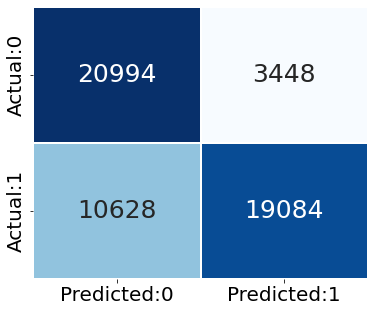

In [163]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, ypred11)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [164]:
sc('STA_XR','Stacking XGB+RF_T',ytest,ypred11)

,KNN,LogisticReg,DT,RF,AD,GB,DT_T,RF_T,XG,XGRF,STA,STA_DR,STA_XR
desc,KNN,LogisticRegression,DecisionTree,Randomforest,AdaBoost,GradientBoost,DT tuned,RF tuned,XGBoost,XGBoost RF,Stacking XGB+DT_T,Stacking RF_T+DT_T,Stacking XGB+RF_T
accuracy train,0.795326,0.725302,1.0,1.0,0.725587,0.736421,0.72793,0.655112,0.761802,0.728689,0.761264,0.72793,0.769771
accuracy test,0.680282,0.722033,0.725247,0.775788,0.723215,0.73411,0.726004,0.64601,0.74061,0.726041,0.739262,0.726004,0.740075
precision,0.709908,0.87904,0.751671,0.868839,0.869757,0.895052,0.876404,0.656326,0.869894,0.87505,0.865084,0.876404,0.846973
recall,0.705607,0.572092,0.745524,0.696486,0.582795,0.583838,0.582795,0.744817,0.619952,0.584074,0.621735,0.582795,0.642299
f1,0.707751,0.693103,0.748585,0.773174,0.69793,0.7067,0.700061,0.697777,0.723957,0.700549,0.723495,0.700061,0.730572
Cohen-kappa,0.354872,0.459113,0.445728,0.556767,0.460333,0.482533,0.466053,0.274708,0.491996,0.465986,0.489034,0.466053,0.488504


In [159]:
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': np.round(model8.feature_importances_,4)})
important_features = important_features.sort_values('Importance', ascending = False)
important_features.head(10)

,Features,Importance
274,Shipping Mode_Standard Class,0.4770
271,Order Status_SUSPECTED_FRAUD,0.0961
0,Days for shipment (scheduled),0.0866
273,Shipping Mode_Second Class,0.0858
272,Shipping Mode_Same Day,0.0603
16,Type_TRANSFER,0.0407
270,Order Status_PROCESSING,0.0232
118,Destination Country_Ecuador,0.0147
13,order_hour,0.0112
149,Destination Country_Irak,0.0095


In [98]:
model4.predict_proba()

In [165]:
tst=score_card_ST.drop(['DT','RF'],1)
tst

,KNN,LogisticReg,AD,GB,DT_T,RF_T,XG,XGRF,STA,STA_DR,STA_XR
desc,KNN,LogisticRegression,AdaBoost,GradientBoost,DT tuned,RF tuned,XGBoost,XGBoost RF,Stacking XGB+DT_T,Stacking RF_T+DT_T,Stacking XGB+RF_T
accuracy train,0.795326,0.725302,0.725587,0.736421,0.72793,0.655112,0.761802,0.728689,0.761264,0.72793,0.769771
accuracy test,0.680282,0.722033,0.723215,0.73411,0.726004,0.64601,0.74061,0.726041,0.739262,0.726004,0.740075
precision,0.709908,0.87904,0.869757,0.895052,0.876404,0.656326,0.869894,0.87505,0.865084,0.876404,0.846973
recall,0.705607,0.572092,0.582795,0.583838,0.582795,0.744817,0.619952,0.584074,0.621735,0.582795,0.642299
f1,0.707751,0.693103,0.69793,0.7067,0.700061,0.697777,0.723957,0.700549,0.723495,0.700061,0.730572
Cohen-kappa,0.354872,0.459113,0.460333,0.482533,0.466053,0.274708,0.491996,0.465986,0.489034,0.466053,0.488504


In [166]:
tst.T

,desc,accuracy train,accuracy test,precision,recall,f1,Cohen-kappa
KNN,KNN,0.795326,0.680282,0.709908,0.705607,0.707751,0.354872
LogisticReg,LogisticRegression,0.725302,0.722033,0.87904,0.572092,0.693103,0.459113
AD,AdaBoost,0.725587,0.723215,0.869757,0.582795,0.69793,0.460333
GB,GradientBoost,0.736421,0.73411,0.895052,0.583838,0.7067,0.482533
DT_T,DT tuned,0.72793,0.726004,0.876404,0.582795,0.700061,0.466053
RF_T,RF tuned,0.655112,0.64601,0.656326,0.744817,0.697777,0.274708
XG,XGBoost,0.761802,0.74061,0.869894,0.619952,0.723957,0.491996
XGRF,XGBoost RF,0.728689,0.726041,0.87505,0.584074,0.700549,0.465986
STA,Stacking XGB+DT_T,0.761264,0.739262,0.865084,0.621735,0.723495,0.489034
STA_DR,Stacking RF_T+DT_T,0.72793,0.726004,0.876404,0.582795,0.700061,0.466053


In [167]:
%%time
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc',n_jobs=-1)
xgb_grid.fit(xtrain, ytrain)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 1, 'learning_rate': 0.5, 'max_depth': 9} 

CPU times: total: 8min 50s
Wall time: 14h 21min 49s


In [175]:
%%time
XG=XGBClassifier(gamma=1,learning_rate=0.5,max_depth=9)
model9=XG.fit(xtrain,ytrain)
ypredt=model9.predict(xtrain)
ypred9=model9.predict(xtest)
print(classification_report(ytest,ypred9))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74     24442
           1       0.81      0.72      0.76     29712

    accuracy                           0.75     54154
   macro avg       0.75      0.76      0.75     54154
weighted avg       0.76      0.75      0.75     54154

CPU times: total: 8min 35s
Wall time: 1min 11s


In [176]:
print(classification_report(ytrain,ypredt))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86     57096
           1       0.92      0.83      0.87     69261

    accuracy                           0.87    126357
   macro avg       0.87      0.87      0.87    126357
weighted avg       0.87      0.87      0.87    126357



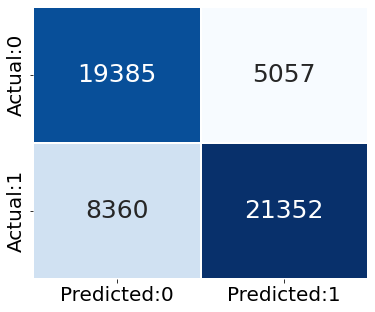

In [177]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, ypred9)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [178]:
sc('XGB_T','XGboost Tuned',ytest,ypred9)

,KNN,LogisticReg,DT,RF,AD,GB,DT_T,RF_T,XG,XGRF,STA,STA_DR,STA_XR,XGB_T
desc,KNN,LogisticRegression,DecisionTree,Randomforest,AdaBoost,GradientBoost,DT tuned,RF tuned,XGBoost,XGBoost RF,Stacking XGB+DT_T,Stacking RF_T+DT_T,Stacking XGB+RF_T,XGboost Tuned
accuracy train,0.795326,0.725302,1.0,1.0,0.725587,0.736421,0.72793,0.655112,0.761802,0.728689,0.761264,0.72793,0.769771,0.86732
accuracy test,0.680282,0.722033,0.725247,0.775788,0.723215,0.73411,0.726004,0.64601,0.74061,0.726041,0.739262,0.726004,0.740075,0.752244
precision,0.709908,0.87904,0.751671,0.868839,0.869757,0.895052,0.876404,0.656326,0.869894,0.87505,0.865084,0.876404,0.846973,0.808512
recall,0.705607,0.572092,0.745524,0.696486,0.582795,0.583838,0.582795,0.744817,0.619952,0.584074,0.621735,0.582795,0.642299,0.718632
f1,0.707751,0.693103,0.748585,0.773174,0.69793,0.7067,0.700061,0.697777,0.723957,0.700549,0.723495,0.700061,0.730572,0.760927
Cohen-kappa,0.354872,0.459113,0.445728,0.556767,0.460333,0.482533,0.466053,0.274708,0.491996,0.465986,0.489034,0.466053,0.488504,0.505674


In [171]:
estimators = [('XG',XGBClassifier(gamma=1,learning_rate=0.5,max_depth=9)),
             ('RF', RandomForestClassifier(criterion='gini',max_depth=10,max_leaf_nodes=11,min_samples_leaf=9,min_samples_split=2,
                          n_estimators=10,random_state=10))]
STA = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model11=STA.fit(xtrain,ytrain)
ypredt=model11.predict(xtrain)
ypred11=model11.predict(xtest)
print(classification_report(ytest,ypred11))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74     24442
           1       0.80      0.73      0.76     29712

    accuracy                           0.75     54154
   macro avg       0.75      0.75      0.75     54154
weighted avg       0.76      0.75      0.75     54154



In [172]:
print(classification_report(ytrain,ypredt))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     57096
           1       0.91      0.84      0.87     69261

    accuracy                           0.87    126357
   macro avg       0.86      0.87      0.87    126357
weighted avg       0.87      0.87      0.87    126357



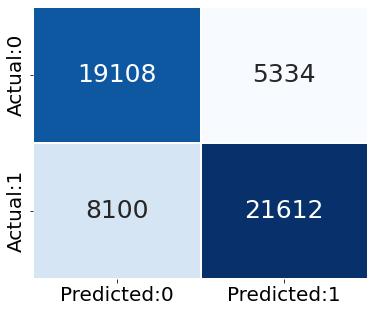

In [173]:
plt.rcParams['figure.figsize']=[6,5]

cm = confusion_matrix(ytest, ypred11)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='Blues',
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [174]:
cohen_kappa_score(ytest,ypred11)

0.5040928448504595

In [179]:
sc('STA_XRT','Stacking XGB_T+RF_T',ytest,ypred11)

,KNN,LogisticReg,DT,RF,AD,GB,DT_T,RF_T,XG,XGRF,STA,STA_DR,STA_XR,XGB_T,STA_XRT
desc,KNN,LogisticRegression,DecisionTree,Randomforest,AdaBoost,GradientBoost,DT tuned,RF tuned,XGBoost,XGBoost RF,Stacking XGB+DT_T,Stacking RF_T+DT_T,Stacking XGB+RF_T,XGboost Tuned,Stacking XGB_T+RF_T
accuracy train,0.795326,0.725302,1.0,1.0,0.725587,0.736421,0.72793,0.655112,0.761802,0.728689,0.761264,0.72793,0.769771,0.86732,0.86732
accuracy test,0.680282,0.722033,0.725247,0.775788,0.723215,0.73411,0.726004,0.64601,0.74061,0.726041,0.739262,0.726004,0.740075,0.752244,0.75193
precision,0.709908,0.87904,0.751671,0.868839,0.869757,0.895052,0.876404,0.656326,0.869894,0.87505,0.865084,0.876404,0.846973,0.808512,0.802049
recall,0.705607,0.572092,0.745524,0.696486,0.582795,0.583838,0.582795,0.744817,0.619952,0.584074,0.621735,0.582795,0.642299,0.718632,0.727383
f1,0.707751,0.693103,0.748585,0.773174,0.69793,0.7067,0.700061,0.697777,0.723957,0.700549,0.723495,0.700061,0.730572,0.760927,0.762893
Cohen-kappa,0.354872,0.459113,0.445728,0.556767,0.460333,0.482533,0.466053,0.274708,0.491996,0.465986,0.489034,0.466053,0.488504,0.505674,0.504093


In [180]:
tst=score_card_ST.drop(['DT','RF'],1)
tst

,KNN,LogisticReg,AD,GB,DT_T,RF_T,XG,XGRF,STA,STA_DR,STA_XR,XGB_T,STA_XRT
desc,KNN,LogisticRegression,AdaBoost,GradientBoost,DT tuned,RF tuned,XGBoost,XGBoost RF,Stacking XGB+DT_T,Stacking RF_T+DT_T,Stacking XGB+RF_T,XGboost Tuned,Stacking XGB_T+RF_T
accuracy train,0.795326,0.725302,0.725587,0.736421,0.72793,0.655112,0.761802,0.728689,0.761264,0.72793,0.769771,0.86732,0.86732
accuracy test,0.680282,0.722033,0.723215,0.73411,0.726004,0.64601,0.74061,0.726041,0.739262,0.726004,0.740075,0.752244,0.75193
precision,0.709908,0.87904,0.869757,0.895052,0.876404,0.656326,0.869894,0.87505,0.865084,0.876404,0.846973,0.808512,0.802049
recall,0.705607,0.572092,0.582795,0.583838,0.582795,0.744817,0.619952,0.584074,0.621735,0.582795,0.642299,0.718632,0.727383
f1,0.707751,0.693103,0.69793,0.7067,0.700061,0.697777,0.723957,0.700549,0.723495,0.700061,0.730572,0.760927,0.762893
Cohen-kappa,0.354872,0.459113,0.460333,0.482533,0.466053,0.274708,0.491996,0.465986,0.489034,0.466053,0.488504,0.505674,0.504093


In [181]:
tst.T

,desc,accuracy train,accuracy test,precision,recall,f1,Cohen-kappa
KNN,KNN,0.795326,0.680282,0.709908,0.705607,0.707751,0.354872
LogisticReg,LogisticRegression,0.725302,0.722033,0.87904,0.572092,0.693103,0.459113
AD,AdaBoost,0.725587,0.723215,0.869757,0.582795,0.69793,0.460333
GB,GradientBoost,0.736421,0.73411,0.895052,0.583838,0.7067,0.482533
DT_T,DT tuned,0.72793,0.726004,0.876404,0.582795,0.700061,0.466053
RF_T,RF tuned,0.655112,0.64601,0.656326,0.744817,0.697777,0.274708
XG,XGBoost,0.761802,0.74061,0.869894,0.619952,0.723957,0.491996
XGRF,XGBoost RF,0.728689,0.726041,0.87505,0.584074,0.700549,0.465986
STA,Stacking XGB+DT_T,0.761264,0.739262,0.865084,0.621735,0.723495,0.489034
STA_DR,Stacking RF_T+DT_T,0.72793,0.726004,0.876404,0.582795,0.700061,0.466053
